<h1 style="text-align: center;">Introduction to Data Science - Assignment 1</h1>
<h3 style="text-align: center;">Name: [Your Name]</h3>
<h3 style="text-align: center;">Student ID: [Your ID]</h3>



## Question 1


In [3]:
# Your fancy code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, zipfile
from io import StringIO
import io

cpp = pd.read_csv('CarPrice_Assignment.csv')
cpp.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
cpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Question 2

#More code and comments...


In [24]:
modCpp = cpp.copy()
columns_to_drop = ['car_ID', 'symboling']
modCpp.drop(columns=columns_to_drop, axis=1, inplace=True)
modCpp.describe(exclude='object').iloc[3:]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
min,86.6,141.1,60.3,47.8,1488.0,61.0,2.54,2.07,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,94.5,166.3,64.1,52.0,2145.0,97.0,3.15,3.11,8.6,70.0,4800.0,19.0,25.0,7788.0
50%,97.0,173.2,65.5,54.1,2414.0,120.0,3.31,3.29,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,102.4,183.1,66.9,55.5,2935.0,141.0,3.58,3.41,9.4,116.0,5500.0,30.0,34.0,16503.0
max,120.9,208.1,72.3,59.8,4066.0,326.0,3.94,4.17,23.0,288.0,6600.0,49.0,54.0,45400.0


In [49]:
print(f"Mean: {cpp['price'].mean()}")
print(f"Median: {cpp['price'].median()}")
print(f"Variance: {cpp['price'].var()}")
print(f"Std: {cpp['price'].std()}")
print(f"Max: {cpp['price'].max()}")
print(f"Min: {cpp['price'].min()}")
print(f"IQR: {cpp['price'].describe().iloc[6]-cpp['price'].describe().iloc[4]}")

Mean: 13276.710570731706
Median: 10295.0
Variance: 63821761.57839796
Std: 7988.85233174315
Max: 45400.0
Min: 5118.0
IQR: 8715.0


In [50]:
grouped_stats = cpp.groupby('doornumber')['price'].agg(['mean', 'median', 'var', 'std', 'max', 'min'])
grouped_stats['IQR'] = cpp.groupby('doornumber')['price'].quantile(0.75) - cpp.groupby('doornumber')['price'].quantile(0.25)
print(grouped_stats)

                    mean   median           var          std      max     min  \
doornumber                                                                      
four        13501.152174  10898.0  5.385059e+07  7338.296321  40960.0  6229.0   
two         12989.924078   9927.0  7.716266e+07  8784.227805  45400.0  5118.0   

                IQR  
doornumber           
four        8866.50  
two         8738.25  


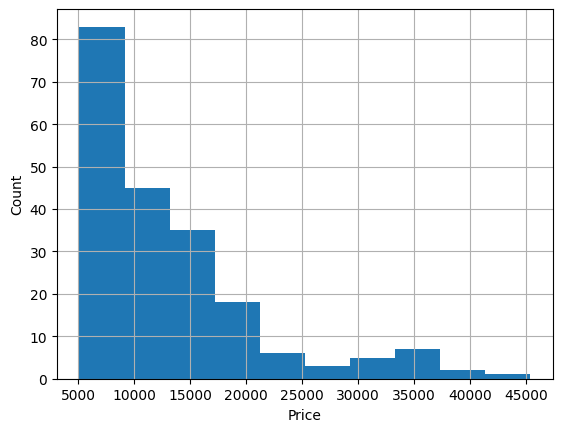

In [54]:
plt.hist(cpp['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Question 3

C:\Users\Hugo Hayashi\AppData\Local\Temp\ipykernel_31224\472328175.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cpp['price'], labels=['Price'])


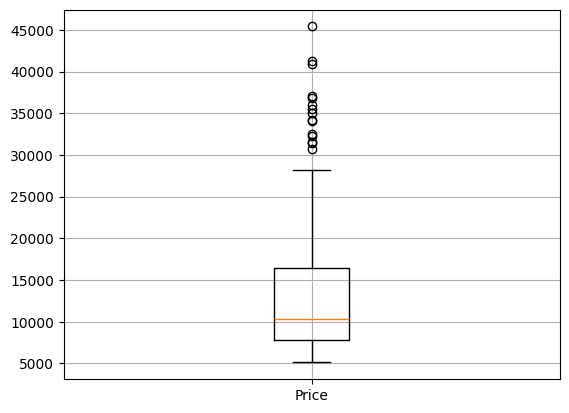

In [57]:
plt.boxplot(cpp['price'], labels=['Price'])
plt.grid(True)
plt.show()

## Question 4